# PDA Chapter 2: Introductory Examples

This chapter covers a set of introductory examples using 3 different datasets

## usa.gov data from bit.ly

In [2]:
# The data is in a json file
path = "data/usagov_bitly_data2012-03-16-1331923249.txt"
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
# We use a json reader
import json
records = [json.loads(line) for line in open(path)]  # list comprehension
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [4]:
records[0]['tz']  # Time zone for record 0

u'America/New_York'

In [5]:
# Counting time zones
time_zones = [rec['tz'] for rec in records]
# This throws an error because not all records have a time zone associated with them 

KeyError: 'tz'

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]  # Print the first 10 rows

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

### Counting timezones in standard Python

In [7]:
# Generating counts approach 1: using base python
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x] = 1
    return counts

get_counts(time_zones[1:10])

{u'': 3,
 u'America/Denver': 1,
 u'America/New_York': 3,
 u'America/Sao_Paulo': 1,
 u'Europe/Warsaw': 1}

In [8]:
# An alternate approach
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)  # values will be initialized to 0
    for x in sequence:
        counts[x] += 1
    return counts

get_counts2(time_zones[1:10])

defaultdict(int,
            {u'': 3,
             u'America/Denver': 1,
             u'America/New_York': 3,
             u'America/Sao_Paulo': 1,
             u'Europe/Warsaw': 1})

In [9]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [10]:
len(time_zones)

3440

In [11]:
# Getting the top 10 counts
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-10:]   # displays the last 10 records

top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [12]:
# An alternate approach is to use the collections.Counter class
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### Counting timezones with pandas

In [13]:
from pandas import DataFrame,Series
import pandas as pd

frame = DataFrame(records)
frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120  non-null values
a              3440  non-null values
al             3094  non-null values
c              2919  non-null values
cy             2919  non-null values
g              3440  non-null values
gr             2919  non-null values
h              3440  non-null values
hc             3440  non-null values
hh             3440  non-null values
kw             93  non-null values
l              3440  non-null values
ll             2919  non-null values
nk             3440  non-null values
r              3440  non-null values
t              3440  non-null values
tz             3440  non-null values
u              3440  non-null values
dtypes: float64(4), object(14)

In [14]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [15]:
# Replace missing/NA values with 'missing'
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

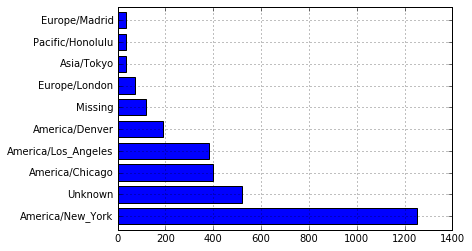

In [16]:
# Plot the counts 
%matplotlib inline
tz_counts[:10].plot(kind='barh',rot=0)

In [18]:
# Next extract the browser info from the 'a' field
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [19]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [20]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [21]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [23]:
# We now try to split the frame by Windows vs Non-Windoes
import numpy as np
cframe = frame[frame.a.notnull()]  # drop all the null records
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows') # much like the ifelse() in R
operating_system[:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: a, dtype: object

In [33]:
# Group data by its timezone column and the operating system
by_tz_os = cframe.groupby(['tz',operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)  # size is analogous to value counts. unstack reshapes into ta
agg_counts[1:10]

a,Not Windows,Windows
tz,,
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1
America/Argentina/Mendoza,0,1


In [35]:
# Select the top overall time zones
# sorts in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [62]:
count_subset = agg_counts.take(indexer)[-10:] # take selects rows based on the indexer, and removes the last 10 rows
count_subset


a,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


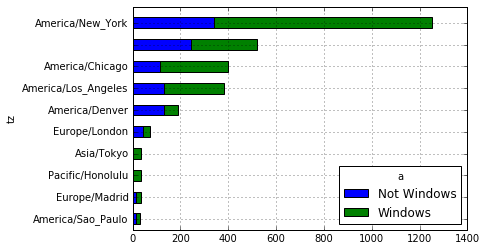

In [39]:
count_subset.plot(kind='barh',stacked=True)

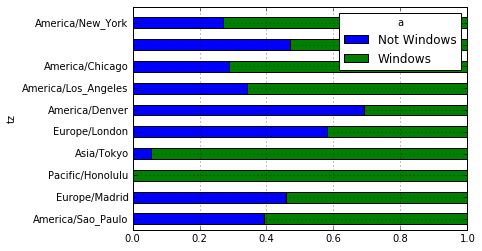

In [42]:
# normalizing the sum to 1
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True)

## MovieLens 1M Data

In [46]:
import pandas as pd
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('data/ml-1m/users.dat',sep='::',header=None,names=unames)

rnames = ['user_id','movie_id','rating','time_stamp']
ratings = pd.read_table('data/ml-1m/ratings.dat',sep='::',header=None,names=rnames)

mnames = ['movie_id','title','genres']
movies = pd.read_table('data/ml-1m/movies.dat',sep='::',header=None,names=mnames)

users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [47]:
ratings[:5]

,user_id,movie_id,rating,time_stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [48]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
ratings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id       1000209  non-null values
movie_id      1000209  non-null values
rating        1000209  non-null values
time_stamp    1000209  non-null values
dtypes: int64(4)

In [50]:
# we will need to merge the above datasets
data = pd.merge(pd.merge(ratings,users),movies) # pandas figures out the merge keys based on overlapping names

In [51]:
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209  non-null values
movie_id      1000209  non-null values
rating        1000209  non-null values
time_stamp    1000209  non-null values
gender        1000209  non-null values
age           1000209  non-null values
occupation    1000209  non-null values
zip           1000209  non-null values
title         1000209  non-null values
genres        1000209  non-null values
dtypes: int64(6), object(4)

In [52]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
time_stamp                                 978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [53]:
# we now get the mean ratings by gender
mean_ratings = data.pivot_table('rating',rows='title', cols='gender',aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [54]:
# next we keep titles with 250+ reviews
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [55]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)', u'28 Days (2000)', u'39 Steps, The (1935)', u'54 (1998)', u'7th Voyage of Sinbad, The (1958)', u'8MM (1999)', u'About Last Night... (1986)', u'Absent Minded Professor, The (1961)', u'Absolute Power (1997)', u'Abyss, The (1989)', u'Ace Ventura: Pet Detective (1994)', u'Ace Ventura: When Nature Calls (1995)', u'Addams Family Values (1993)', u'Addams Family, The (1991)', u'Adventures in Babysitting (1987)', u'Adventures of Buckaroo Bonzai Across the 8th Dimension, The (1984)', u'Adventures of Priscilla, Queen of the Desert, The (1994)', u'Adventures of Robin Hood, The (1938)', u'African Queen, The (1951)', u'Age of Innocence, The (1993)', u'Agnes of God (1985)', u'Air America (1990)', u'Air Force One

In [59]:
# the above list can now be used to select rows from mean ratings
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 'burbs, The (1989) to eXistenZ (1999)
Data columns (total 2 columns):
F    1216  non-null values
M    1216  non-null values
dtypes: float64(2)

In [64]:
# Sort to see top movies among female viewers
top_female_ratings = mean_ratings.sort_index(by='F',ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring Rating Disagreement

In [66]:
# Create a new column called 'diff' that tracks the difference between male and female ratings
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [68]:
# to get the top 15 rows for movies preferred by men over women
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [70]:
# Next we look at movies that had the most disagreement among viewers, irrespective of gender. 
# We look at the variance or stdev of ratings
ratings_std_by_title = data.groupby('title')['rating'].std()
ratings_std_by_title = ratings_std_by_title.ix[active_titles]
ratings_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US Baby Names 1880-2010

In [73]:
# Check one of the downloaded files
import pandas as pd

names1880 = pd.read_csv('data/names/yob1880.txt',names=['name','sex','births'])
names1880

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000  non-null values
sex       2000  non-null values
births    2000  non-null values
dtypes: int64(1), object(2)

In [74]:
# Find the number of male and female babies born in 1880
names1880.groupby('sex').births.sum()

sex
F       90992
M      110490
Name: births, dtype: int64

In [81]:
# We have files until 2015. We read the all of these files in
years = range(1880,2016)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'data/names/yob%d.txt' %year
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate into a single data frame
names = pd.concat(pieces,ignore_index=True)
names

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858689 entries, 0 to 1858688
Columns: 4 entries, name to year
dtypes: int64(2), object(2)

In [82]:
total_births = names.pivot_table('births',rows='year',cols='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,1777242,1910876
2015,1769325,1898858


In [83]:
# Add proportions
def add_prop(group):
    births = group.births.astype(float)  # convert births from interger to float for division
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858689 entries, 0 to 1858688
Columns: 5 entries, name to prop
dtypes: float64(1), int64(2), object(2)

In [84]:
# Check to see if proportions add up to 1
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [86]:
# extract the top1000 names for each sex, year combination
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 271877 entries, (1880, F, 0) to (2015, M, 1845729)
Data columns (total 5 columns):
name      271877  non-null values
sex       271877  non-null values
births    271877  non-null values
year      271877  non-null values
prop      271877  non-null values
dtypes: float64(1), int64(2), object(2)

In [87]:
top1000[:10]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077644
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021310
         4     Minnie   F    1746  1880  0.019189
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015540
         8     Bertha   F    1320  1880  0.014507
         9      Sarah   F    1288  1880  0.014155

### Analyzing Naming Trends

In [91]:
# Get the top 1000 boy and girl names
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']
# pivot table of total number of births by year and name
total_births = top1000.pivot_table('births',rows='year',cols='name',aggfunc=sum)
total_births

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1880 to 2015
Columns: 7057 entries, Aaden to Zuri
dtypes: float64(7057)

In [93]:
# Plot the time series for a few names
subset = total_births[['John','Harry','Mary','Marilyn']]
subset[:10]

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701,2158,7092,NaN
1881,8795,2002,6948,NaN
1882,9597,2246,8178,NaN
1883,8934,2116,8044,NaN
1884,9428,2338,9253,NaN
1885,8801,2209,9166,NaN
1886,9074,2272,9921,NaN
1887,8166,2070,9935,NaN
1888,9299,2772,11804,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x108992650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1119defd0>], dtype=object)

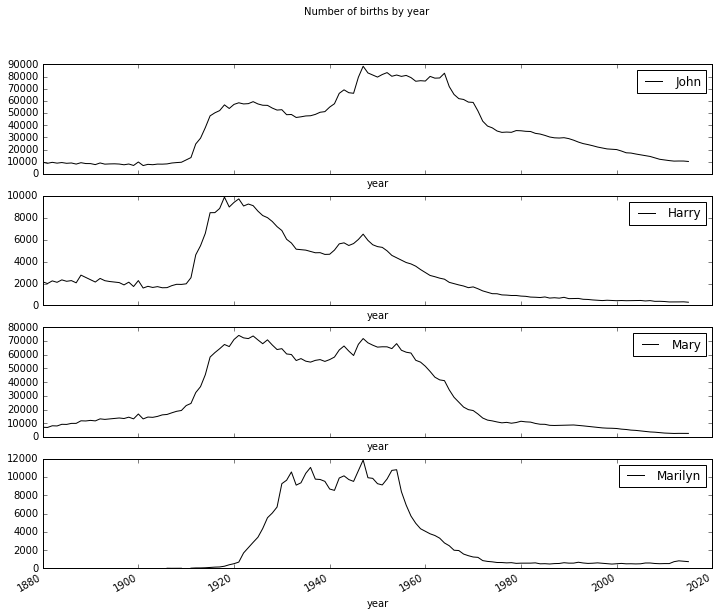

In [94]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births by year")

#### Measuring increase in name diversity

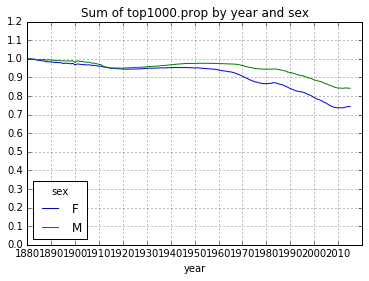

In [95]:
# One hypothesis for the decrease in popularity over time is that few parents are choosing popular names. 
# We now check the increase in diversity
table = top1000.pivot_table('prop',rows='year',cols='sex',aggfunc=sum)
table.plot(title='Sum of top1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [96]:
# The plot above demonstrates increasing name diversity 
# (i.e. the top 1000 names constitute a smaller proportion of the total)
# Next consider the number of distinct names in the top 50% of births. We begin with boy names from 2015
df = boys[boys.year==2015]
df

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (2015, M, 1844730) to (2015, M, 1845729)
Data columns (total 5 columns):
name      1000  non-null values
sex       1000  non-null values
births    1000  non-null values
year      1000  non-null values
prop      1000  non-null values
dtypes: float64(1), int64(2), object(2)

In [97]:
prop_cumsum= df.sort_index(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2015  M    1844730    0.010275
           1844731    0.019902
           1844732    0.028610
           1844733    0.036940
           1844734    0.045265
           1844735    0.053160
           1844736    0.060904
           1844737    0.068519
           1844738    0.076061
           1844739    0.083227
dtype: float64

In [100]:
prop_cumsum.searchsorted(0.5) +1 # since the arrays are 0 indexed

135

In [101]:
# So in 2015, the top 50% of births had 135 unique names. We compare this with 1900
df = boys[boys.year==1900]
in1900 = df.sort_index(by='prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [102]:
# In 1900, there were only 25 unique names in the top 50% of births
# We define the above as a function, and apply it to each year and sex
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(0.5) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


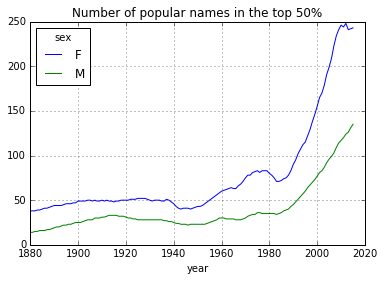

In [103]:
# Girl names have always been more diverse than boy names
diversity.plot(title='Number of popular names in the top 50%')

#### The 'last letter' revolution

In [105]:
# extract last letter from the name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [107]:
last_letters[:10]

0    y
1    a
2    a
3    h
4    e
5    t
6    a
7    e
8    a
9    h
Name: last_letter, dtype: object

In [114]:
table = names.pivot_table('births',rows=last_letters,cols=['sex','year'],aggfunc=sum)
table[[1]]

sex,F
year,1881
last_letter,
a,31581
b,NaN
c,NaN
d,607
e,34080
f,NaN
g,5
h,4783


In [115]:
# next we pick 3 representative years
subtable = table.reindex(columns=[1915,1965,2015],level='year')
subtable.head()

sex               F                       M                
year           1915    1965    2015    1915    1965    2015
last_letter                                                
a            257374  640022  656283    3271    4753   28729
b               NaN     185     595    1578    2208   29356
c                 8     108    1246    1946   22648   22956
d             18445    3351    3206  112883  219145   43501
e            307664  372191  324850  102858  133403  127686

In [116]:
# normalize the above table by total births
subtable.sum()

sex  year
F    1915     983876
     1965    1765063
     2015    1769325
M    1915     848603
     1965    1861377
     2015    1898858
dtype: float64

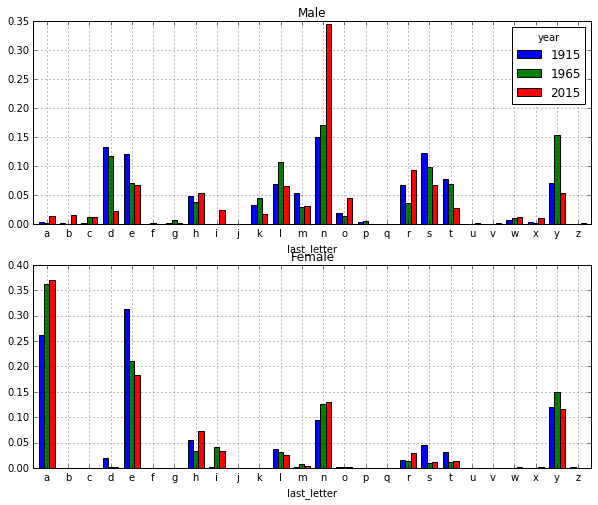

In [119]:
letter_prop = subtable/subtable.sum()
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)
# we observe names ending in n to have grown in popularity in male names

In [120]:
# We now try to generate a time series for a subset of letter endings for boy names
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'],'M'].T
dny_ts.head()

,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


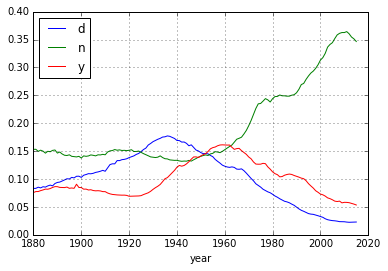

In [121]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [122]:
# we begin by tracking the name Leslie and its variations

all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [124]:
# We filter down to the above combinations
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376034
Lesly      11431
Name: births, dtype: int64

In [126]:
# aggregate by sex and year, and normalize within year
table = filtered.pivot_table('births',rows='year',cols='sex',aggfunc=sum)
table = table.div(table.sum(1),axis=0)
table.tail()

sex,F,M
year,,
2011,1,NaN
2012,1,NaN
2013,1,NaN
2014,1,NaN
2015,1,NaN


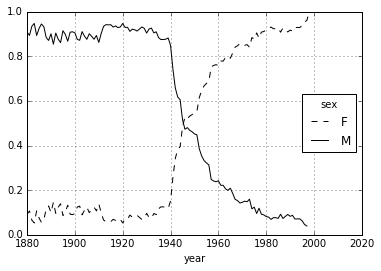

In [127]:
# plot the time series
table.plot(style={'M':'k-','F':'k--'})